# Python for Data Analysis 




## Introduction

Data is powerful, but the data doesn't speak for itself. That's where Python comes to help. 

- Cross-platform
- Python saves you a huge amount of time
- Really cool functions to perform advanced statistical analysis
- Foundation for more advanced topics in data science like machine learning, artificial intelligence, data visualization, etc.


#### What you need?

- A strong motivation to learn Python and Data Analysis

#### What you DO NOT need?

- Professional programming experience
- Advanced knowledge in math and statistics

Enjoy!

## Outline


- Install Jupyter Notebook
    - Download
    - Open course material
- Python basics
    - Math
    - Numpy
- Value at Risk
    - What is VAR
    - Calcaulate VAR
        - Historical
        - Variance
- VAR for single stock
- VAR for multiple stocks
- Summary

### Some preparation before we get started

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline 
from pandas_datareader import data, wb
import datetime
import numpy
import seaborn as sns
sns.set(style="darkgrid", context="poster")

In [4]:
# Comments in Python start with sharp (#) and extend to the end of the line. 
# Use comments when you want to make notes. 

print("Do you have freestyle?")

Do you have freestyle?


### Basic math

In [9]:
x = 7
y = 9

# math opts
x ** y

40353607

### Numpy

**NumPy** stands for Numerical Python. The most powerful feature of NumPy is n-dimensional array. This library also contains basic linear algebra functions. 

The cell below will import all useful libraries you need to finish this case. Just run it before we continue!

In [12]:
a = [1, 2, 3, 4, 5, 6]
numpy.min(a)

1

## Value at Risk (VAR)

In general, the Value at Risk (VAR) measures the potential return in value of a risky asset or portfolio during a time period. It has three components: **a time period**, **the probablity (of a return smaller than or equal to the specified return)** and **a return amount (or return percentage)**.



![VAR](VaR_diagram.png)


VAR is used most often by commercial and investment banks to capture the potential loss of their traded portfolios over a specified period. The first regulatory measures that evoke Value at Risk (VAR) were initiated in 1980, when the SEC tied the capital requirements of financial service firms to the losses that would be incurred, with **95% confidence** over a thirty-day interval, in different security classes; **historical returns** were used to compute these potential losses. 

In 1995, J.P. Morgan provided public access to data on the **variances of and covariances** across various security and asset classes, that it had used internally for almost a decade to manage risk, and allowed software makers to develop software to measure risk. 

There are numerous approaches used to compute Value at Risk. The measure can be computed by investigating the return distritutions for market risks, and by using the variances in and covariances across these risks. It can also be estimated by running Monte Calo simulations through historical data. In this study we are going to discuss the two methonds below:

- Historical method
- Variance method


## Extract data from web
Let's extract the stock price of **Facebook** from *1 Jan 2016* to *1 Jan 2017* in only 3 lines.

In [2]:
# set start and end date
start = datetime.datetime(2016, 1, 1)
end = datetime.datetime(2017, 1, 1)
f = data.DataReader("FB", "google", start, end)

# "FB" --> stock name
# "google" --> server name
# start --> start date
# end --> end date

Simple facts about Python:

- Python is able to connect to SQL, Excel Spreatsheet, CSV, SAS Dataset.
- Python is the most popular language to get data from web.

### DataFrame
Two-dimensional tabular data structure with labeled axes (**rows** and **columns**). 

In [13]:
f

,Open,High,Low,Close,Volume
Date,,,,,
2016-01-04,101.95,102.24,99.75,102.22,37717312
2016-01-05,102.89,103.71,101.66,102.73,23258238
2016-01-06,101.13,103.77,100.90,102.97,25096183
2016-01-07,100.50,101.43,97.30,97.92,45172906
2016-01-08,99.88,100.50,97.03,97.33,35402298
2016-01-11,97.91,98.60,95.39,97.51,29932385
2016-01-12,99.00,99.96,97.55,99.37,28395390
2016-01-13,100.58,100.58,95.21,95.44,33091576
2016-01-14,95.85,98.87,92.45,98.37,48488509


### Select column

In [14]:
# select one column
f['Close']

Date
2016-01-04    102.22
2016-01-05    102.73
2016-01-06    102.97
2016-01-07     97.92
2016-01-08     97.33
2016-01-11     97.51
2016-01-12     99.37
2016-01-13     95.44
2016-01-14     98.37
2016-01-15     94.97
2016-01-19     95.26
2016-01-20     94.35
2016-01-21     94.16
2016-01-22     97.94
2016-01-25     97.01
2016-01-26     97.34
2016-01-27     94.45
2016-01-28    109.11
2016-01-29    112.21
2016-02-01    115.09
2016-02-02    114.61
2016-02-03    112.69
2016-02-04    110.49
2016-02-05    104.07
2016-02-08     99.75
2016-02-09     99.54
2016-02-10    101.00
2016-02-11    101.91
2016-02-12    102.01
2016-02-16    101.61
               ...  
2016-11-17    117.79
2016-11-18    117.02
2016-11-21    121.77
2016-11-22    121.47
2016-11-23    120.84
2016-11-25    120.38
2016-11-28    120.41
2016-11-29    120.87
2016-11-30    118.42
2016-12-01    115.10
2016-12-02    115.40
2016-12-05    117.43
2016-12-06    117.31
2016-12-07    117.95
2016-12-08    118.91
2016-12-09    119.68
2016-12-

### Make plot

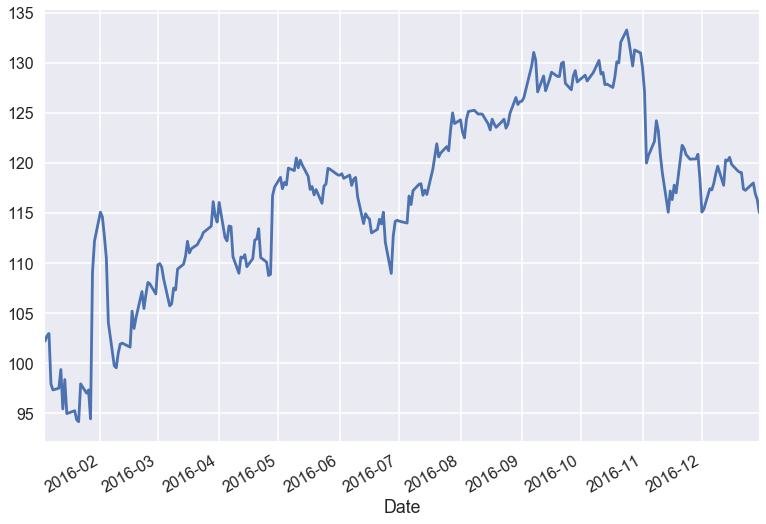

In [15]:
f['Close'].plot()

### Select multiple columns

In [16]:
f[['High', 'Low']]

,High,Low
Date,,
2016-01-04,102.24,99.75
2016-01-05,103.71,101.66
2016-01-06,103.77,100.90
2016-01-07,101.43,97.30
2016-01-08,100.50,97.03
2016-01-11,98.60,95.39
2016-01-12,99.96,97.55
2016-01-13,100.58,95.21
2016-01-14,98.87,92.45


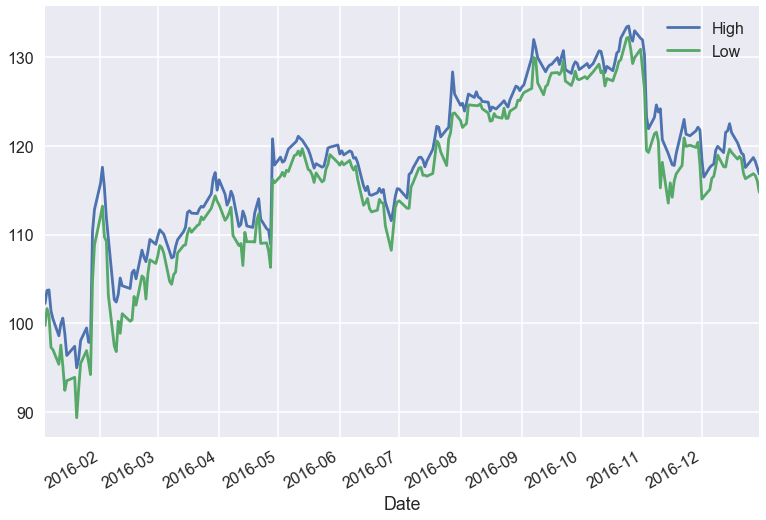

In [17]:
# make a plot
f[['High', 'Low']].plot()

### Calculate return

In [18]:
f

,Open,High,Low,Close,Volume
Date,,,,,
2016-01-04,101.95,102.24,99.75,102.22,37717312
2016-01-05,102.89,103.71,101.66,102.73,23258238
2016-01-06,101.13,103.77,100.90,102.97,25096183
2016-01-07,100.50,101.43,97.30,97.92,45172906
2016-01-08,99.88,100.50,97.03,97.33,35402298
2016-01-11,97.91,98.60,95.39,97.51,29932385
2016-01-12,99.00,99.96,97.55,99.37,28395390
2016-01-13,100.58,100.58,95.21,95.44,33091576
2016-01-14,95.85,98.87,92.45,98.37,48488509


In [19]:
# shift column by 1 unit
f['Close_2'] = f['Close'].shift(1)

In [20]:
f

,Open,High,Low,Close,Volume,Close_2
Date,,,,,,
2016-01-04,101.95,102.24,99.75,102.22,37717312,NaN
2016-01-05,102.89,103.71,101.66,102.73,23258238,102.22
2016-01-06,101.13,103.77,100.90,102.97,25096183,102.73
2016-01-07,100.50,101.43,97.30,97.92,45172906,102.97
2016-01-08,99.88,100.50,97.03,97.33,35402298,97.92
2016-01-11,97.91,98.60,95.39,97.51,29932385,97.33
2016-01-12,99.00,99.96,97.55,99.37,28395390,97.51
2016-01-13,100.58,100.58,95.21,95.44,33091576,99.37
2016-01-14,95.85,98.87,92.45,98.37,48488509,95.44


In [21]:
# drop invalid rows
f = f.drop(f.index[0])

In [22]:
f

,Open,High,Low,Close,Volume,Close_2
Date,,,,,,
2016-01-05,102.89,103.71,101.66,102.73,23258238,102.22
2016-01-06,101.13,103.77,100.90,102.97,25096183,102.73
2016-01-07,100.50,101.43,97.30,97.92,45172906,102.97
2016-01-08,99.88,100.50,97.03,97.33,35402298,97.92
2016-01-11,97.91,98.60,95.39,97.51,29932385,97.33
2016-01-12,99.00,99.96,97.55,99.37,28395390,97.51
2016-01-13,100.58,100.58,95.21,95.44,33091576,99.37
2016-01-14,95.85,98.87,92.45,98.37,48488509,95.44
2016-01-15,93.98,96.38,93.54,94.97,45935550,98.37


In [23]:
# calculate return
f['Return'] = (f['Close'] - f['Close_2'])/f['Close_2']

In [24]:
f

,Open,High,Low,Close,Volume,Close_2,Return
Date,,,,,,,
2016-01-05,102.89,103.71,101.66,102.73,23258238,102.22,0.004989
2016-01-06,101.13,103.77,100.90,102.97,25096183,102.73,0.002336
2016-01-07,100.50,101.43,97.30,97.92,45172906,102.97,-0.049043
2016-01-08,99.88,100.50,97.03,97.33,35402298,97.92,-0.006025
2016-01-11,97.91,98.60,95.39,97.51,29932385,97.33,0.001849
2016-01-12,99.00,99.96,97.55,99.37,28395390,97.51,0.019075
2016-01-13,100.58,100.58,95.21,95.44,33091576,99.37,-0.039549
2016-01-14,95.85,98.87,92.45,98.37,48488509,95.44,0.030700
2016-01-15,93.98,96.38,93.54,94.97,45935550,98.37,-0.034563


The **plot()** function will return the plot of given series, whereas **hist()** will give a histogram.

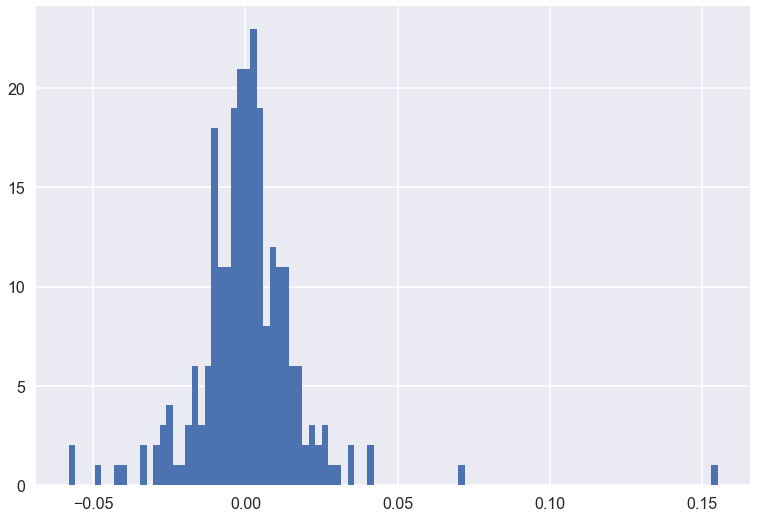

In [25]:
f['Return'].hist(bins=100) #use parameter to define number of bins

### VAR calculated from historical method

The historical method of estimating VAR is based on the actual periodic changes in the risk factors over a lookback period. By ordering return values from the most negative to most positive, we can find the lowest 5% of daily returns (since the returns are ordered from left to right, the worst are always the "left tail"). 

**numpy.percentile** computes the qth percentile of the data along the specified axis.

In [29]:
numpy.percentile(f['Return'], 5)

-0.025728345964516966

### VAR calculated from variance

The second methond we are going to use is the **variance methond**. Often we assume that the risk factors are distributed normally. Assuming normally allows us to estimate the risk based only on means and variances.

For a given stock, if the return is normally distributed with mean $\mu$ and standard deviation $\sigma$ (square root of variance), the VAR can be obtained as below:

$$VAR = \mu - \alpha * \sigma$$

where $\alpha$ is determined by confidence level:

- c = 95%, $\alpha$ = 1.65


**numpy.mean()** computes the mean value of a series, **numpy.std()** computes the standard deviation of a series.

In [28]:
numpy.mean(f['Return']) - 1.65*numpy.std(f['Return'])

-0.02876738354412071

## Estimating VAR of  Portfolio

Consider a portfolio with three stocks (**Google**, **Starbucks**, and **Disney**).  

Use the following information to estimate the 5% annual VAR for a portfolio from 1 Jan 2016 to 1 Mar 2016.

|Stock   | Composition  | 
|---|---|
|GOOG   | 10%  |  
|SBUX | 50% |
|DIS| 40%|



The portfolio return is given by:

$$ \mu_{Portfolio} = W_A\mu_A + W_B\mu_B + W_C\mu_C$$

The portfolio variance is given by:

$$ \sigma_{Portfolio}^2 = W_A^2\sigma_A^2 + W_B^2\sigma_B^2 + W_C^2\sigma_C^2$$

In [ ]:
# Step1 - Extract data
f_google = data.DataReader("GOOG", 'google', start, end)

# Finish the calculation of Starbucks and Disney
f_fb = data.DataReader("SBUX", 'google', start, end)
f_ms = data.DataReader("DIS", 'google', start, end)

In [ ]:
# Step2 - Compute mean and std for each stock

# Write your code here

In [ ]:
mean_portf = 0.1 * mean_google + 0.5 * mean_fb + 0.4 * mean_ms

In [ ]:
variance_portf = (0.1 * std_google)**2 + (0.5 * std_fb)**2 + 0.4 * (std_ms)**2
std_portf = variance_portf**0.5

In [ ]:
VAR_portf = mean_portf - 1.65 * std_portf
VAR_portf

# Summary

### Python
- Math
- Numpy 
    - mean
    - max
    - min
    - std
    - percentile

- DataFrame
    - select column(s)
    - caculation
    
- Plot
    - .plot
    - .hist
    
### VAR
- Historical
- Variance
- Single stock
- Portfolio